<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/03_01_histogram_and_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

In [5]:
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [2]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [4]:
img1 = "eminem.jpg"
url = f"{base}{img1}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21684  100 21684    0     0   129k      0 --:--:-- --:--:-- --:--:--  129k


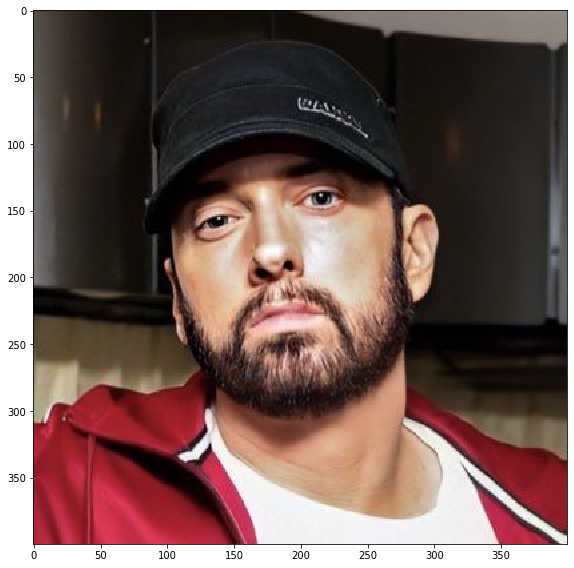

In [7]:
eminem = loadImg(img1)
show(eminem)

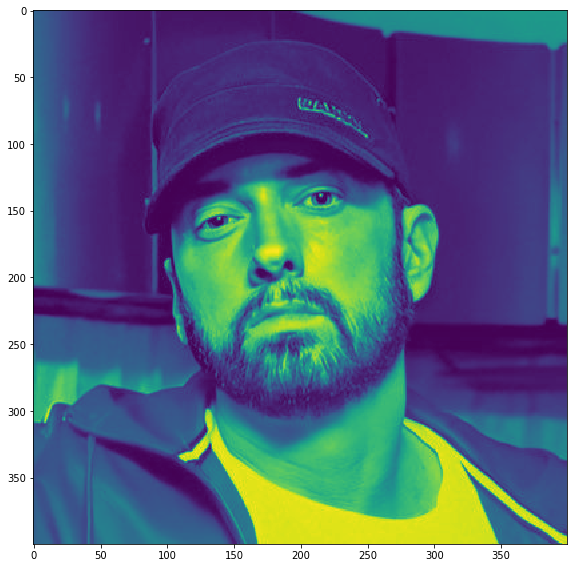

In [8]:
eminemgs = cv2.cvtColor(eminem, cv2.COLOR_RGB2GRAY)
show(eminemgs)

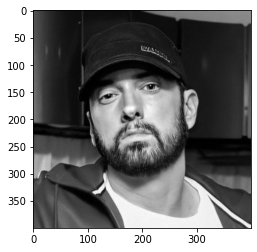

In [13]:
plt.imshow(eminemgs, 'gray')

hist(im) = num pixels de im de intensidad i

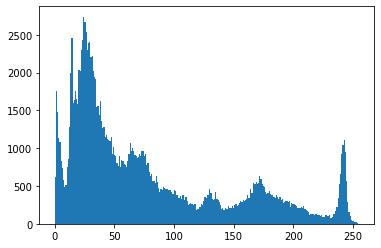

In [15]:
plt.hist(eminemgs.ravel(), 256)
plt.show()

In [16]:
print(type(eminem), eminem.shape)
print(type(eminemgs), eminemgs.shape)

<class 'numpy.ndarray'> (400, 400, 3)
<class 'numpy.ndarray'> (400, 400)


In [17]:
a = np.array(list(range(1, 101)))
print(a)
a = a.reshape((4, 25))
print(a)
a = a.reshape((4, 5, 5))
print(a)
print(a.ravel())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20  21  22  23  24  25]
 [ 26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
   44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
   69  70  71  72  73  74  75]
 [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
   94  95  96  97  98  99 100]]
[[[  1   2   3   4   5]
  [  6   7   8   9  10]
  [ 11  12  13  14  15]
  [ 16  17  18  19  20]
  [ 21  22  23  24  25]]

 [[ 26  27  28  29  30]
  [ 31  32  33  34  35]
  

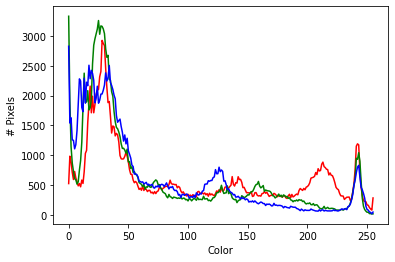

In [24]:
rgb = ["Red", "Green", "Blue"]
for chani in range(3):
  hist, bins = np.histogram(eminem[:, :, chani], bins=256, range=(0, 256))
  plt.plot(bins[0: -1], hist, color=rgb[chani])

plt.xlabel("Color")
plt.ylabel("# Pixels")

plt.show()

In [38]:
def equalize_hist(im):
  rows, cols = im.shape
  hist, bins = np.histogram(im, bins=256, range=(0, 256))
  hist = hist / (rows * cols)
  
  accum = np.zeros((256))
  accum[0] = hist[0]
  for i in range(1, 256):
    accum[i] = accum[i - 1] + hist[i]

  out = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
      out[i, j] = accum[im[i, j]]

  return np.floor(256*out + 0.5).astype(np.int)

(-11.75, 268.75, 0.0, 2875.95)

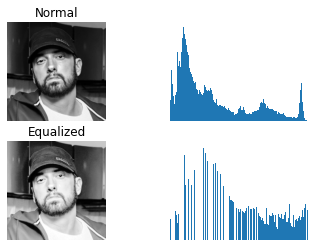

In [40]:
eminemeq = equalize_hist(eminemgs)
plt.subplot(2, 2, 1)
plt.imshow(eminemgs, 'gray')
plt.title("Normal")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.hist(eminemgs.ravel(), 256)
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(eminemeq, 'gray')
plt.title("Equalized")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.hist(eminemeq.ravel(), 256)
plt.axis("off")

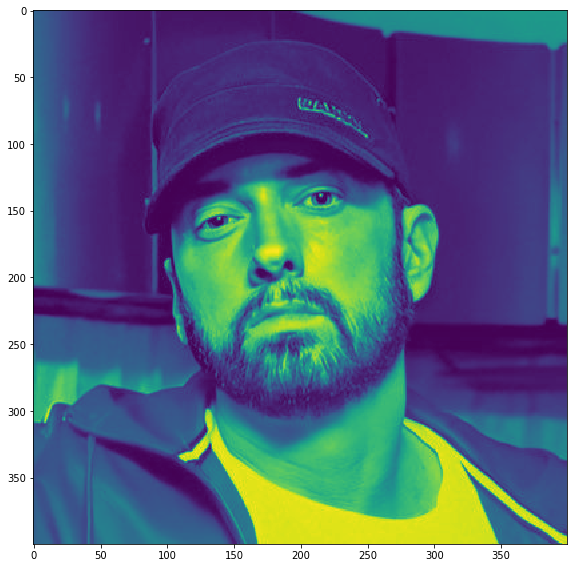

In [41]:
show(eminemgs)

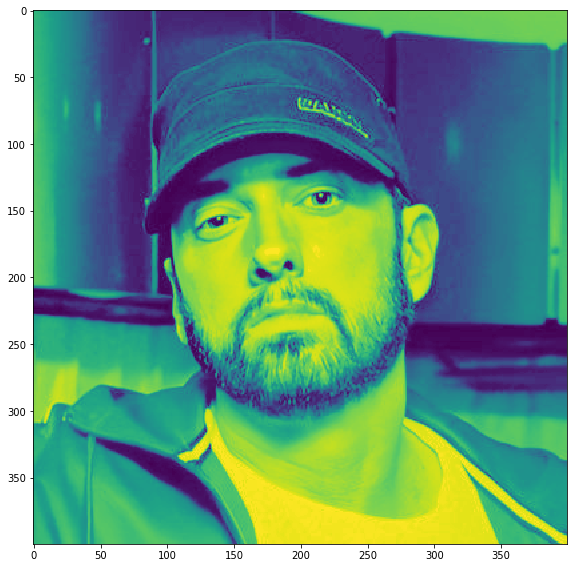

In [42]:
show(eminemeq)